## **Basic Image Classsification Model Using Artificial Neural Network**

In [29]:
#installing tensorflow
! pip install -q tensorflow-gpu

ERROR: Operation cancelled by user


In [30]:
import tensorflow as tf

In [31]:
print(tf.__version__)

2.8.0


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
from tensorflow.keras.datasets import fashion_mnist

In [34]:
#import libraries 
!pip install keras-tuner --upgrade
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import keras_tuner

In [35]:
#load dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [36]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [37]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [38]:
np.max(y_train), np.min(y_train)

(9, 0)

In [39]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


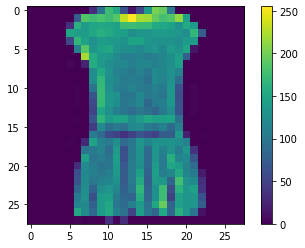

In [40]:
# Data Exploration
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [41]:
# Normalizing the dataset 
# scaled down the grey image between 0 and 255. Increase the calculation efficiancy
x_train = x_train / 255.0
x_test = x_test / 255.0

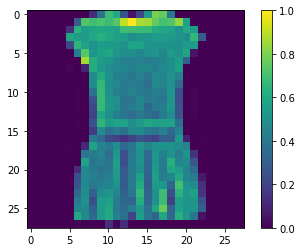

In [42]:
#check after normalization
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [43]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


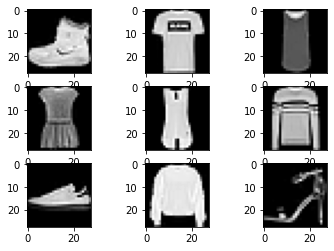

In [44]:

# example of loading the fashion mnist dataset
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [45]:
#reshaping the dataset
#For Flattens images to 1-D vector of 784 features (28*28) i.e., 
#it coverts the 2-D NumPy array of dimension 28*28 to a 1-D array of length 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# reshape the data into 1D vectors
#x_train = x_train.reshape(len(x_train),28,28,1)
#x_test = x_test.reshape(len(x_test),28,28,1)
#x_train.shape, x_test.shape

In [46]:
len(x_train)

60000

In [47]:
#Build the model
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))

# Adding the second layer with dropout (30%)
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [48]:
#Training the model
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5508 - sparse_categorical_accuracy: 0.8065
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.8503
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3848 - sparse_categorical_accuracy: 0.8602
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3495 - sparse_categorical_accuracy: 0.8721
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3304 - sparse_categorical_accuracy: 0.8787
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3193 - sparse_categorical_accuracy: 0.8831
Epoch 9/10
1875/1875 [=======

In [51]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3433 - sparse_categorical_accuracy: 0.8800


In [52]:
test_accuracy

0.8799999952316284

In [53]:
# Model prediction
#y_pred = model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(y_pred)

[9 2 1 ... 8 1 5]


In [54]:
y_pred[110],  y_test[110] # predicted and actual output
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [55]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[830   1  13  19   3   0 124   1   9   0]
 [  2 974   1  16   3   0   2   0   2   0]
 [  9   2 712   9 141   0 126   0   1   0]
 [ 27  14   3 885  30   0  38   0   3   0]
 [  0   1  53  33 823   0  90   0   0   0]
 [  0   0   0   0   0 948   0  30   1  21]
 [118   1  56  25  66   0 722   0  12   0]
 [  0   0   0   0   0   7   0 952   0  41]
 [  3   0   1   4   1   1   4   4 982   0]
 [  0   0   0   0   0   3   1  24   0 972]]


In [56]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.88


# Hyperparameter Optimization

In [ ]:
#Hyperparameter Tuning 
# Decide the number of Hidden layers and neurons neural network
# 1. How many number of hidden layers we should have ?
# 2. How many number of nuerons should have in hiden neural network?
# 3. What is the learning rate?

In [70]:
# Load MNIST

from tensorflow.keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

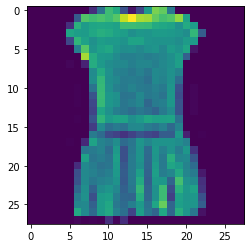

In [71]:
# Visualize the first input
plt.imshow(X_train[3])

In [72]:
# Create Adam Optimizer

from tensorflow.keras.optimizers import Adam

opt_1 = Adam(learning_rate=0.001)

In [92]:
# Base Model (Model 1)

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5238 - accuracy: 0.8198 - val_loss: 0.4865 - val_accuracy: 0.8312
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4459 - accuracy: 0.8468 - val_loss: 0.4735 - val_accuracy: 0.8369
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4283 - accuracy: 0.8521 - val_loss: 0.4594 - val_accuracy: 0.8410
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8555 - val_loss: 0.4649 - val_accuracy: 0.8375
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4090 - accuracy: 0.8590 - val_loss: 0.4498 - val_accuracy: 0.8422
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4044 - accuracy: 0.8599 - val_loss: 0.4491 - val_accuracy: 0.8447
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3993 - accuracy: 0.8615 - val_loss: 0.4453 - val_accuracy:

In [93]:
# Adding number of parameters (Model 2)
opt_2 = Adam(learning_rate=0.001)
model_2 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2.compile(optimizer=opt_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5543 - accuracy: 0.8088 - val_loss: 0.5141 - val_accuracy: 0.8163
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4146 - accuracy: 0.8553 - val_loss: 0.4416 - val_accuracy: 0.8464
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3798 - accuracy: 0.8656 - val_loss: 0.4067 - val_accuracy: 0.8574
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3544 - accuracy: 0.8737 - val_loss: 0.3880 - val_accuracy: 0.8601
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8788 - val_loss: 0.3835 - val_accuracy: 0.8631
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3263 - accuracy: 0.8832 - val_loss: 0.3792 - val_accuracy: 0.8640
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3186 - accuracy: 0.8852 - val_loss: 0.3745 - val_accuracy:

In [94]:
# Increasing the learning rate (Model 3)

opt_3 = Adam(learning_rate=0.00001)
model_3 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7171 - accuracy: 0.5022 - val_loss: 1.3706 - val_accuracy: 0.6348
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1845 - accuracy: 0.6640 - val_loss: 1.0604 - val_accuracy: 0.6724
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9618 - accuracy: 0.6972 - val_loss: 0.9054 - val_accuracy: 0.7046
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8420 - accuracy: 0.7287 - val_loss: 0.8173 - val_accuracy: 0.7327
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7696 - accuracy: 0.7529 - val_loss: 0.7605 - val_accuracy: 0.7517
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7209 - accuracy: 0.7702 - val_loss: 0.7210 - val_accuracy: 0.7641
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6854 - accuracy: 0.7811 - val_loss: 0.6915 - val_accuracy:

In [95]:
# Greatly add number of parameters (Model 4)

opt_4 = Adam(learning_rate=0.001)
model_4 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dropout(0.03),
                     layers.Dense(128, activation='relu'),
                     layers.Dropout(0.03),
                     layers.Dense(128, activation='relu'),
                     layers.Dropout(0.03),
                     layers.Dense(10, activation='softmax')])

model_4.compile(optimizer=opt_4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5029 - accuracy: 0.8180 - val_loss: 0.4434 - val_accuracy: 0.8363
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.8609 - val_loss: 0.4023 - val_accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3449 - accuracy: 0.8738 - val_loss: 0.3684 - val_accuracy: 0.8653
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3212 - accuracy: 0.8807 - val_loss: 0.3507 - val_accuracy: 0.8726
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3018 - accuracy: 0.8878 - val_loss: 0.3487 - val_accuracy: 0.8765
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2911 - accuracy: 0.8926 - val_loss: 0.3610 - val_accuracy: 0.8701
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2822 - accuracy: 0.8953 - val_loss: 0.3381 - val_accuracy:

In [96]:
# Add Regularization / Dropout to reduce overfitting

from tensorflow.keras.regularizers import L2

opt_5 = Adam(learning_rate=0.001)
model_5 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_5.compile(optimizer=opt_5, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_5.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7752 - accuracy: 0.8102 - val_loss: 0.6041 - val_accuracy: 0.8410
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5749 - accuracy: 0.8415 - val_loss: 0.5360 - val_accuracy: 0.8497
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5316 - accuracy: 0.8477 - val_loss: 0.5561 - val_accuracy: 0.8332
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5089 - accuracy: 0.8538 - val_loss: 0.5241 - val_accuracy: 0.8535
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4935 - accuracy: 0.8578 - val_loss: 0.5244 - val_accuracy: 0.8442
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4882 - accuracy: 0.8597 - val_loss: 0.5270 - val_accuracy: 0.8485
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4837 - accuracy: 0.8597 - val_loss: 0.4871 - val_accuracy:

In [97]:
# Model evaluation
test_loss, test_accuracy = model_4.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8804


In [98]:
Y_pred = np.argmax(model_4.predict(X_test), axis=-1)

In [99]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[830   1  13  19   3   0 124   1   9   0]
 [  2 974   1  16   3   0   2   0   2   0]
 [  9   2 712   9 141   0 126   0   1   0]
 [ 27  14   3 885  30   0  38   0   3   0]
 [  0   1  53  33 823   0  90   0   0   0]
 [  0   0   0   0   0 948   0  30   1  21]
 [118   1  56  25  66   0 722   0  12   0]
 [  0   0   0   0   0   7   0 952   0  41]
 [  3   0   1   4   1   1   4   4 982   0]
 [  0   0   0   0   0   3   1  24   0 972]]
